In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.regression.linear_model as sm
import numpy as np

In [43]:
auto = pd.read_csv('Automobile_data.csv')

In [49]:
model_data = auto[['horsepower','price']]

In [52]:
q_row = model_data[(model_data['horsepower']=='?') | (model_data['price']=='?')].index
model_data.drop(index = q_row, inplace=True)

In [62]:
model_data = model_data.applymap(int)

In [74]:
# Two ways
# OLS.from_formula(f, data)
f = 'price ~ horsepower' # independent variables = 'regressors'
model_object_formula = sm.OLS.from_formula(formula=f, data=model_data).fit()
model_object_formula.summary()
# this adds a bo term automatically?

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     377.3
Date:                Wed, 28 Aug 2019   Prob (F-statistic):           1.19e-47
Time:                        10:42:00   Log-Likelihood:                -1963.3
No. Observations:                 199   AIC:                             3931.
Df Residuals:                     197   BIC:                             3937.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4562.1750    974.995     -4.679      0.000   -6484.943   -2639.407
horsepower   172.2063      8.866     19.424      0.000     154.722     189.690
==============================================================================
Omnibus:                       38.494   Durbin-Watson:                   0.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.496
Skew:                           1.013   Prob(JB):                     9.89e-15
Kurtosis:                       4.916   Cond. No.                         323.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
model_object_formula.params

Intercept    -4562.174996
horsepower     172.206251
dtype: float64

In [72]:
# OLS(Y,X)
model_object = sm.OLS(model_data['price'],model_data['horsepower']).fit()
model_object.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     1760.
Date:                Wed, 28 Aug 2019   Prob (F-statistic):          1.82e-100
Time:                        10:36:50   Log-Likelihood:                -1973.8
No. Observations:                 199   AIC:                             3950.
Df Residuals:                     198   BIC:                             3953.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
horsepower   133.2026      3.175     41.951      0.000     126.941     139.464
==============================================================================
Omnibus:                       78.584   Durbin-Watson:                   0.554
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.717
Skew:                           1.766   Prob(JB):                     5.80e-45
Kurtosis:                       6.477   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

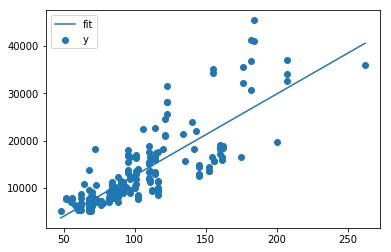

In [95]:
plt.scatter(model_data['horsepower'],model_data['price'], label='y')
# plt.scatter(model_data['horsepower'],model_object_formula.fittedvalues, label='y_hat')
plt.plot([min(model_data['horsepower']), max(model_data['horsepower'])],[min(model_object_formula.fittedvalues),max(model_object_formula.fittedvalues)], label='fit') # from formula
plt.legend()
plt.show()

In [91]:
model_object_formula.params

Intercept    -4562.174996
horsepower     172.206251
dtype: float64

In [79]:
output = model_data
output['residuals'] = model_object.resid

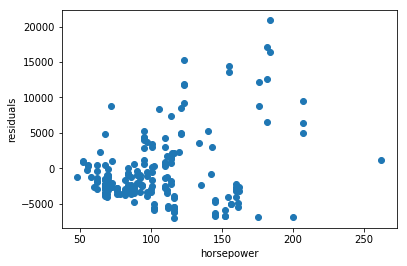

In [88]:
plt.scatter(output['horsepower'],output['residuals'])
plt.xlabel('horsepower')
plt.ylabel('residuals')
plt.show()


In [ ]:
# Assumptions that can be violated 
# Heteroskedasticity, like above
# deal with it by transform variables with log or weighting terms

# Errors shouldn't be correlated with each other (i.e. with n value), need to be independent
# Residuals shouldn't be linear with respect to variable, or else you've missed some correlation. Should be random around zero.

# Residuals across the other independent variables are somehow related to each other (i.e. not independent errors)

# Influential outliers
# Use Cook's distance/levers to test the outliers for removal (1 may be the threshold)
# Studentized test would test if the distribution of the errors is normal and an outlier of that distribution